In [1]:
# Requirement Lib Import
import os
import random
import tensorflow as tf
from tensorflow import keras

In [2]:
# Check GPU support and Get GPU device
from tensorflow.python.client import device_lib 

try:
    print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))
    print(device_lib.list_local_devices())
except:
      print('No GPU devices found!')

Num GPUs Available:  1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7045358987756601253
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3134364059
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16818782135792294252
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [68]:
# Set default desired model input shape size
INPUT_SIZE = (100, 100)

In [69]:
# List path locations
BASE_PATH = './dataset'
BASE_DATASET_PATH = os.path.join(BASE_PATH, 'hand-sign-bisindo', 'anoted')
BASE_DATASET_EXT_PATH = os.path.join(BASE_PATH, 'hand-sign-bisindo', 'extracted')

TRAIN_DATASET_PATH = os.path.join(BASE_DATASET_EXT_PATH, 'train')
VALIDATION_DATASET_PATH = os.path.join(BASE_DATASET_EXT_PATH, 'val')
TEST_DATASET_PATH = os.path.join(BASE_DATASET_EXT_PATH, 'test')

In [6]:
# Split dataset into training, validation, and testing with following ratio 0.8, 0.1, and 0.1
# Uncomment if your data isn't in correct folder

# import splitfolders
# splitfolders.ratio(BASE_DATASET_PATH, output = BASE_DATASET_EXT_PATH, seed = 1092, ratio = (0.8, 0.1, 0.1), group_prefix = None)

In [70]:
static_labels = os.listdir(TRAIN_DATASET_PATH)

for label in static_labels:
    print('Total TRAINING \'{}\' Images:'.format(label), len(os.listdir(os.path.join(TRAIN_DATASET_PATH, label))))

Total TRAINING 'A' Images: 192
Total TRAINING 'B' Images: 140
Total TRAINING 'C' Images: 106
Total TRAINING 'D' Images: 188
Total TRAINING 'E' Images: 160
Total TRAINING 'F' Images: 147
Total TRAINING 'G' Images: 152
Total TRAINING 'H' Images: 164
Total TRAINING 'I' Images: 170
Total TRAINING 'J' Images: 96
Total TRAINING 'K' Images: 140
Total TRAINING 'L' Images: 101
Total TRAINING 'M' Images: 131
Total TRAINING 'N' Images: 153
Total TRAINING 'O' Images: 248
Total TRAINING 'P' Images: 170
Total TRAINING 'Q' Images: 136
Total TRAINING 'R' Images: 148
Total TRAINING 'S' Images: 164
Total TRAINING 'T' Images: 146
Total TRAINING 'U' Images: 242
Total TRAINING 'V' Images: 175
Total TRAINING 'W' Images: 124
Total TRAINING 'X' Images: 144
Total TRAINING 'Y' Images: 154
Total TRAINING 'Z' Images: 149


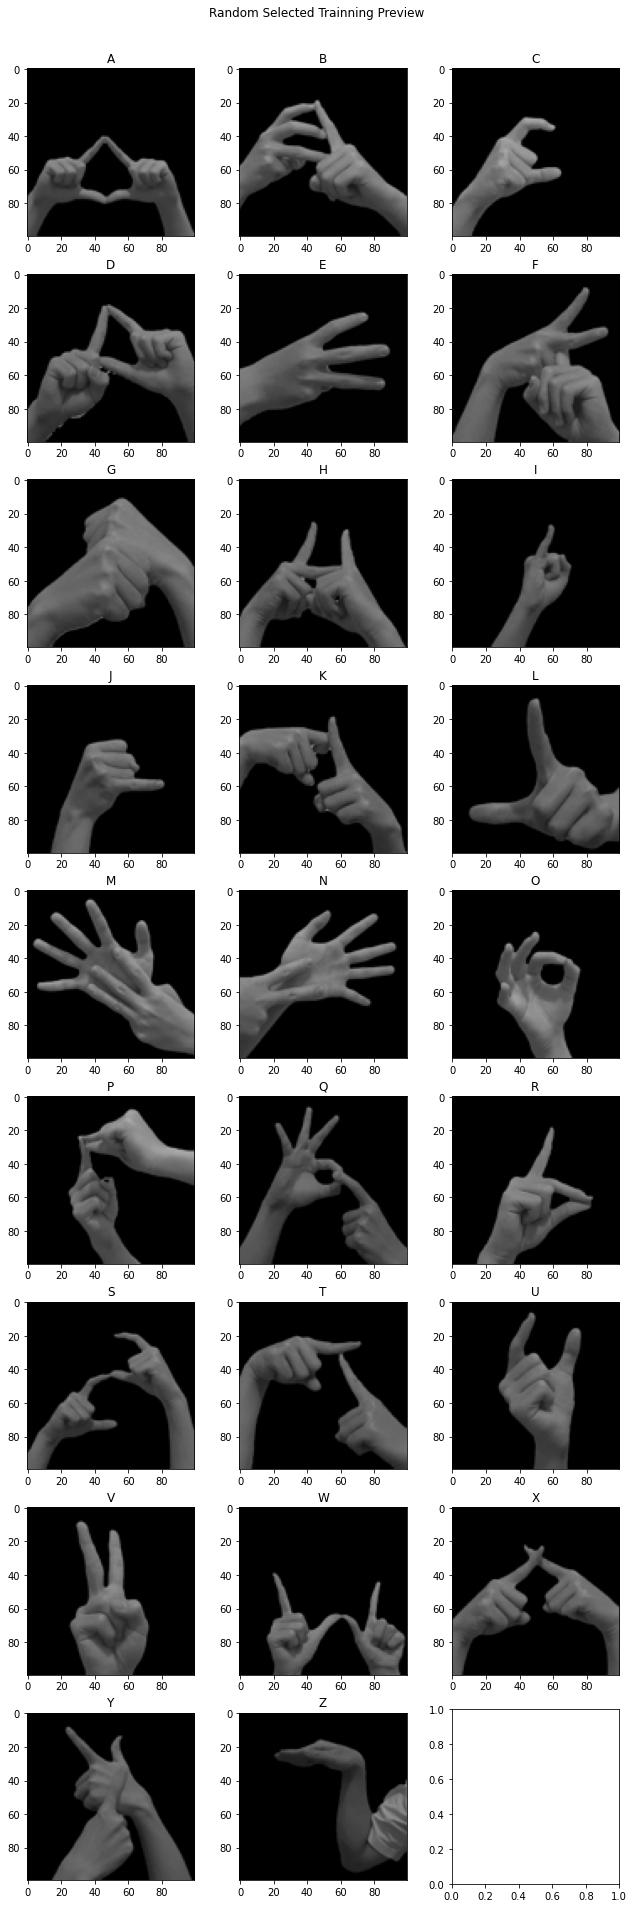

In [71]:
# Requirement Lib Import
import math
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Random seed
seed = random.randint(0, 42)

# plot matrix size
cols = 3
rows = math.ceil(len(static_labels) / 3)

# Show image plot
fig_size = 3
fig, axs = plt.subplots(rows, cols, figsize = ((fig_size * cols), (fig_size * rows)))
fig.suptitle('Random Selected Trainning Preview')
fig.tight_layout()
fig.subplots_adjust(top = 0.95)
axs = axs.ravel()

# Image training random selector
img_dict = {}
for idx, label in enumerate(static_labels):
    img_path = os.path.join(TRAIN_DATASET_PATH, label)
    img_rand = os.listdir(img_path)[seed]
    img_selc = image.load_img(os.path.join(img_path, img_rand))

    axs[idx].imshow(img_selc.resize(INPUT_SIZE))
    axs[idx].set_title(label)

In [72]:
# Dataset pre-processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1 / 255,
    rotation_range = 10,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
validation_datagen = ImageDataGenerator(rescale = 1 / 255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DATASET_PATH,
    target_size = INPUT_SIZE,
    class_mode = 'categorical'
)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DATASET_PATH,
    target_size = INPUT_SIZE,
    class_mode = 'categorical'
)

Found 4040 images belonging to 26 classes.
Found 497 images belonging to 26 classes.


In [73]:
# defined classes based on foldering structure, sort by alphabetical
LABELS = list(train_generator.class_indices.keys())
NUM_CLASSES = len(LABELS) # Set classes num
print(NUM_CLASSES)

26


In [74]:
# Creating Model
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size set with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (INPUT_SIZE[0], INPUT_SIZE[1], 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation = 'relu'),
    # Classification layer
    tf.keras.layers.Dense(NUM_CLASSES, activation = 'softmax')
])

# Check the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)        

In [75]:
# Compiling model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [76]:
class EarlyStoppingAtGivenAccuracy(keras.callbacks.Callback):
    """
        Stop training when the accuracy at given threshold
    """
    def __init__(self, threshold = 0.9):
        super(EarlyStoppingAtGivenAccuracy, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs = None):
        logs = logs or {}
        acc = logs.get('accuracy')
        if acc is not None:
            if acc >= self.threshold:
                print('Epoch {}: Reached baseline, stop training'.format(epoch))
                self.model.stop_training = True

In [77]:
# Start Training with custom callback!

callback = EarlyStoppingAtGivenAccuracy(0.98)
try:
      history = model.fit(
            train_generator,
            steps_per_epoch = 20,
            epochs = 40,
            verbose = 1,
            validation_data = validation_generator,
            validation_steps = 3,
            batch_size = 32,
            callbacks = [callback]
      )
except Exception as e:
      print(e)

Epoch 1/40
20/20 [==============================] - 5s 178ms/step - loss: 3.2445 - accuracy: 0.0669 - val_loss: 3.2307 - val_accuracy: 0.0625
Epoch 2/40
20/20 [==============================] - 4s 178ms/step - loss: 3.2329 - accuracy: 0.0667 - val_loss: 3.2041 - val_accuracy: 0.0938
Epoch 3/40
20/20 [==============================] - 4s 176ms/step - loss: 3.1386 - accuracy: 0.0882 - val_loss: 2.7087 - val_accuracy: 0.2083
Epoch 4/40
20/20 [==============================] - 4s 191ms/step - loss: 2.7877 - accuracy: 0.1759 - val_loss: 2.3803 - val_accuracy: 0.3438
Epoch 5/40
20/20 [==============================] - 4s 178ms/step - loss: 2.5650 - accuracy: 0.2274 - val_loss: 1.8198 - val_accuracy: 0.4688
Epoch 6/40
20/20 [==============================] - 4s 183ms/step - loss: 2.2728 - accuracy: 0.3299 - val_loss: 1.7158 - val_accuracy: 0.4792
Epoch 7/40
20/20 [==============================] - 4s 191ms/step - loss: 2.1846 - accuracy: 0.3600 - val_loss: 1.3380 - val_accuracy: 0.6250
Epoch 

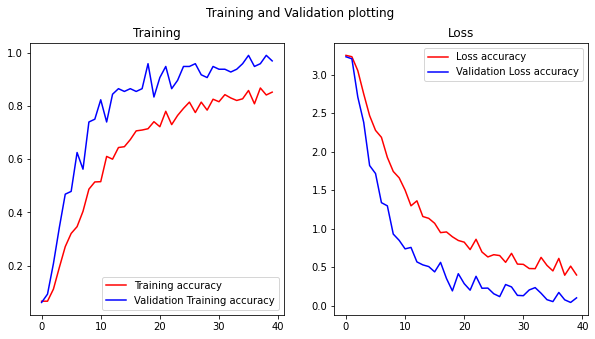

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig, axs = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle('Training and Validation plotting')
axs[0].plot(epochs, acc, 'r', label = 'Training accuracy')
axs[0].plot(epochs, val_acc, 'b', label = 'Validation Training accuracy')
axs[0].set_title('Training')
axs[0].legend()
axs[1].plot(epochs, loss, 'r', label = 'Loss accuracy')
axs[1].plot(epochs, val_loss, 'b', label = 'Validation Loss accuracy')
axs[1].set_title('Loss')
axs[1].legend()
plt.show()

In [63]:
# import tensorflow as tf
# model = tf.keras.models.load_model(os.path.join(os.getcwd(), 'models','hand-sign-bisindo-model(70x70).h5'))

In [114]:
def selectRandomImage():
    seed = random.randint(1, NUM_CLASSES)
    label_seed = LABELS[seed - 1]
    path = os.path.join(TEST_DATASET_PATH, label_seed)
    test_dir = os.listdir(path)
    test_dir_num = len(test_dir)
    file_name = os.listdir(path)[random.randint(0, test_dir_num - 1)]
    return (os.path.join(path, file_name), label_seed)

In [115]:
def createResultPlot(prediction_list, prediction_label, actual_label):
    # Result Plot
    fig, axs = plt.subplots(1, 2, figsize = (10, 5))
    fig.suptitle('Image {} predict as: {}'.format(file_name, prediction_label))
    fig.subplots_adjust(top = 0.95)
    fig.tight_layout()
    axs = axs.ravel()

    # See other color refrences: https://xkcd.com/color/rgb/
    if prediction_label == actual_label:
        #If prediction True
        fig.patch.set_facecolor('xkcd:mint green')
    else:
        #If prediction False
        fig.patch.set_facecolor('xkcd:pale pink')

    # Show selected image
    axs[0].set_title(actual_label)
    axs[0].imshow(img)

    # Prediction Probabilities Plot
    axs[1].set_title('Probabilities')
    axs[1].bar(range(0, NUM_CLASSES), prediction_list, align = 'center')
    axs[1].set_xticks(range(0, NUM_CLASSES))
    axs[1].set_xticklabels(LABELS)

    plt.show()

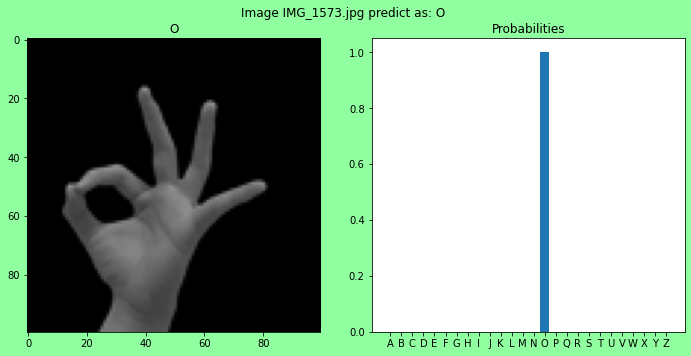

In [118]:
# Predicting Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# predicting images
file_path, label = selectRandomImage()
img = image.load_img(file_path).resize(INPUT_SIZE)
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

prediction = model.predict(x, batch_size = 10)[0] # Predict Image
index = int(prediction.argmax(axis = -1)) # Get max classes index

# Result Plot
createResultPlot(prediction.reshape(NUM_CLASSES), LABELS[index], label)

In [103]:
# Save model
model.save(os.path.join(os.getcwd(), 'models','hand-sign-bisindo-model(100x100).h5'))